# 5 Baseline Stock Forecasting using a GRU-Based Model
## 5.a) GRU-Based Forecasting Model: Construction, Training & Evaluation
### In this step, we build a GRU-based neural network model to forecast future stock prices based on historical time series data.

---

<details> <summary><strong>1. Purpose & Overview</strong></summary> <br>

This block defines and trains a GRU-based neural network model for time series forecasting of stock prices.

**Key Functions Performed**:

- Imports required libraries for data processing, modeling, and visualization  
- Limits GPU memory to 50% to prevent out-of-memory issues  
- Loads preprocessed training and testing datasets (`X_train`, `y_train`, `X_test`, `y_test`, `yc_train`, `yc_test`)  
- Defines a sequential GRU model using TensorFlow/Keras with two GRU layers and dense layers for regression  
- Trains the GRU model on the dataset  
- Plots training and validation loss curves  
- Saves the final trained model to disk

</details>

---

<details> <summary><strong>2. Why This Matters</strong></summary> <br>

- GRU (Gated Recurrent Unit) networks are efficient at learning temporal dependencies in sequential data  
- Ideal for stock forecasting due to their ability to capture trends, seasonality, and noise  
- Using multiple GRU layers enables modeling of more complex patterns  
- Saving the model enables reproducibility and deployment  
- Loss curves help track model performance across epochs

</details>

---

<details> <summary><strong>3. Output & Results</strong></summary> <br>

**Saved Files**:
- Trained GRU model: `GRU_Model.h5`

**Output**:
- Console logs for training and validation loss across 100 epochs  
- Summary of model architecture  
- Line plot showing training and validation MSE loss trends
- RMSE error for training and testing
- Stock plot for training and testing  

</details>

---

In [47]:
import time

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from numpy import *
from math import sqrt
from pandas import *
from datetime import datetime, timedelta
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Bidirectional
from tensorflow.keras.layers import BatchNormalization, Embedding, TimeDistributed, LeakyReLU
from tensorflow.keras.layers import GRU, LSTM
from tensorflow.keras.optimizers import Adam
from matplotlib import pyplot
from pickle import load

In [48]:
import os
# Create the directory if it doesn't exist
os.makedirs("../Training_loss", exist_ok=True)
os.makedirs("../Model", exist_ok=True)

In [49]:
# Limit GPU memory to 50%
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    # Assuming your GPU has 8GB memory, you set memory_limit to 4GB (50%).
    tf.config.experimental.set_virtual_device_configuration(
        physical_devices[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=4096)]  # 50% of 8GB GPU
    )

In [50]:
# Load data
X_train = np.load("../Model_train_data/X_train.npy", allow_pickle=True)
y_train = np.load("../Model_train_data/y_train.npy", allow_pickle=True)
X_test = np.load("../Model_train_data/X_test.npy", allow_pickle=True)
y_test = np.load("../Model_train_data/y_test.npy", allow_pickle=True)
yc_train = np.load("../Model_train_data/yc_train.npy", allow_pickle=True)
yc_test = np.load("../Model_train_data/yc_test.npy", allow_pickle=True)

In [51]:
# Extract the shape of the training data to define the input and output dimensions for the model
input_dim = X_train.shape[1]
feature_size = X_train.shape[2]
output_dim = y_train.shape[1]

In [52]:
# Parameters
LR = 0.0001
BATCH_SIZE = 64
N_EPOCH = 100

In [53]:
# Step 6: Define the basic GRU model function
def basic_GRU(input_dim, output_dim, feature_size, X_train, y_train, X_test, y_test, LR, N_EPOCH, BATCH_SIZE) -> tf.keras.models.Model:
    model = Sequential()
    model.add(GRU(units=128, return_sequences=True, input_shape=(input_dim, feature_size)))
    model.add(GRU(units=64))
    model.add(Dense(32))
    model.add(Dense(units=output_dim))
    model.compile(optimizer=Adam(lr=LR), loss='mse')

    history = model.fit(
    X_train, y_train,
    epochs=N_EPOCH,
    batch_size=BATCH_SIZE,
    validation_split=0.1,  # Use 10% of the training data for validation
    verbose=2,
    shuffle=False)


    return model, history

In [54]:
print("GRU Training")
# Train the model
model, history = basic_GRU(input_dim, output_dim, feature_size, X_train, y_train, X_test, y_test, LR, N_EPOCH, BATCH_SIZE)

GRU Training
Epoch 1/100


C:\Users\ASUS\anaconda3\envs\gpu_env\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


10/10 - 5s - loss: 0.1262 - val_loss: 0.1530 - 5s/epoch - 522ms/step
Epoch 2/100
10/10 - 0s - loss: 0.0636 - val_loss: 0.0562 - 140ms/epoch - 14ms/step
Epoch 3/100
10/10 - 0s - loss: 0.0332 - val_loss: 0.0132 - 145ms/epoch - 15ms/step
Epoch 4/100
10/10 - 0s - loss: 0.0208 - val_loss: 0.0034 - 118ms/epoch - 12ms/step
Epoch 5/100
10/10 - 0s - loss: 0.0140 - val_loss: 0.0028 - 138ms/epoch - 14ms/step
Epoch 6/100
10/10 - 0s - loss: 0.0086 - val_loss: 0.0026 - 146ms/epoch - 15ms/step
Epoch 7/100
10/10 - 0s - loss: 0.0057 - val_loss: 0.0026 - 142ms/epoch - 14ms/step
Epoch 8/100
10/10 - 0s - loss: 0.0047 - val_loss: 0.0025 - 146ms/epoch - 15ms/step
Epoch 9/100
10/10 - 0s - loss: 0.0044 - val_loss: 0.0026 - 152ms/epoch - 15ms/step
Epoch 10/100
10/10 - 0s - loss: 0.0043 - val_loss: 0.0026 - 133ms/epoch - 13ms/step
Epoch 11/100
10/10 - 0s - loss: 0.0043 - val_loss: 0.0026 - 132ms/epoch - 13ms/step
Epoch 12/100
10/10 - 0s - loss: 0.0043 - val_loss: 0.0026 - 140ms/epoch - 14ms/step
Epoch 13/100
10

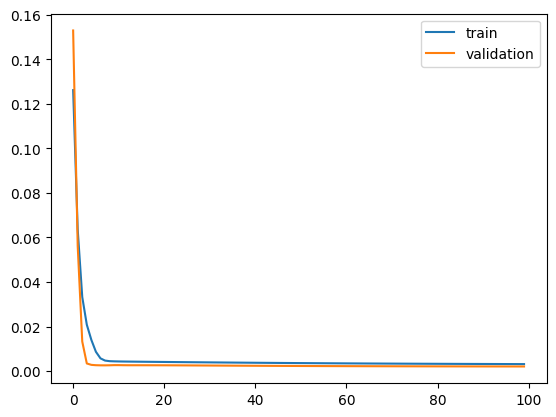

In [55]:
# Plot the loss curves
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='validation')
pyplot.legend()
plt.savefig('../Training_loss/GRU_loss_plot.png')

# Show the plot
pyplot.show()

In [56]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 3, 128)            53376     
                                                                 
 gru_3 (GRU)                 (None, 64)                37248     
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 92,737
Trainable params: 92,737
Non-trainable params: 0
_________________________________________________________________


In [57]:
model.save('../Model/GRU_Model.h5')

In [58]:
print("GRU Model Prediction on test data")
yhat = model.predict(X_test, verbose=1)

GRU Model Prediction on test data
10/10 [==============================] - 1s 3ms/step


In [59]:
rmse = sqrt(mean_squared_error(y_test, yhat))
print(rmse)

0.041981766337905256


C:\Users\ASUS\anaconda3\envs\gpu_env\lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.2.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17328\1470446011.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  predict_result['predicted_mean'] = predict_result.mean(axis=1)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17328\1470446011.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, 

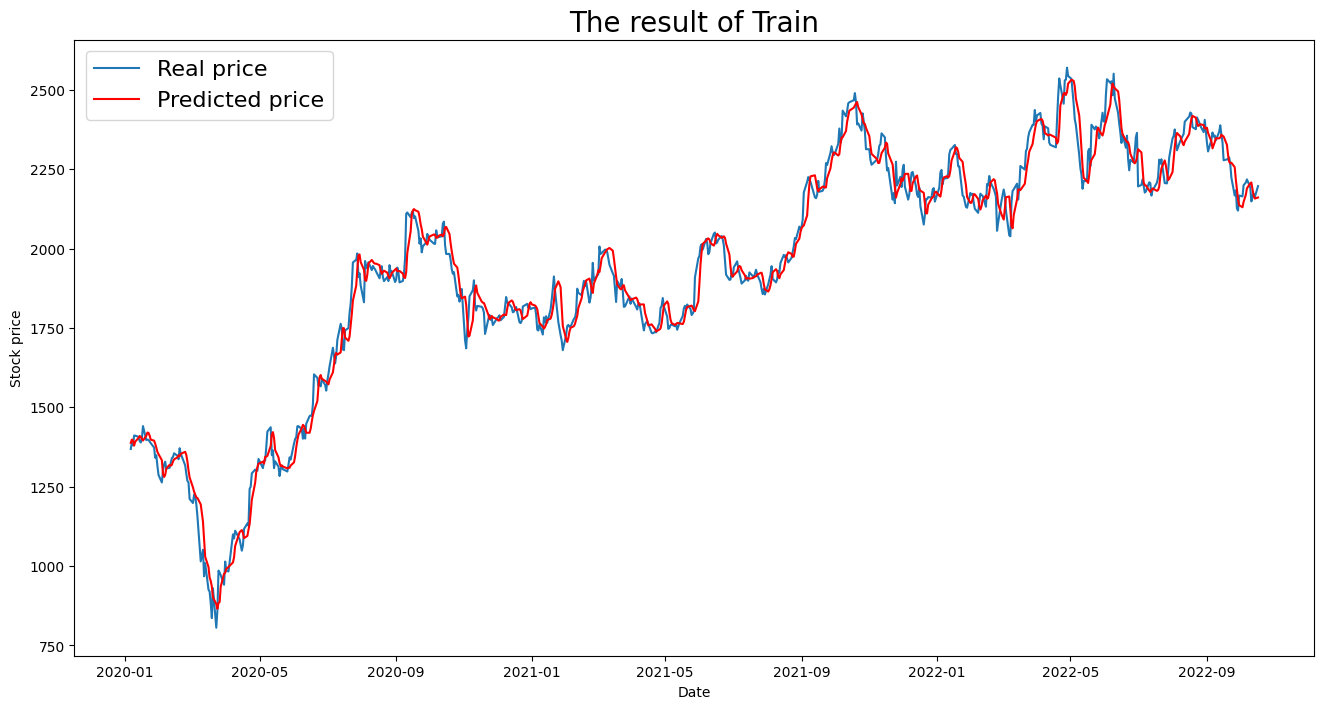

----- Train_RMSE_GRU ----- 49.53729788593922


In [60]:
# %% --------------------------------------- Plot the result  -----------------------------------------------------------------
## TRAIN DATA
def plot_traindataset_result(X_train, y_train):
    train_yhat = model.predict(X_train, verbose=0)

    y_scaler = load(open('../Model_train_data/y_scaler.pkl', 'rb'))
    train_predict_index = np.load("../Model_train_data/index_train.npy", allow_pickle=True)

    rescaled_real_y = y_scaler.inverse_transform(y_train)
    rescaled_predicted_y = y_scaler.inverse_transform(train_yhat)

    predict_result = pd.DataFrame()
    for i in range(rescaled_predicted_y.shape[0]):
        y_predict = pd.DataFrame(rescaled_predicted_y[i], columns=["predicted_price"],
                                 index=train_predict_index[i:i + output_dim])
        predict_result = pd.concat([predict_result, y_predict], axis=1, sort=False)

    real_price = pd.DataFrame()
    for i in range(rescaled_real_y.shape[0]):
        y_train = pd.DataFrame(rescaled_real_y[i], columns=["real_price"],
                               index=train_predict_index[i:i + output_dim])
        real_price = pd.concat([real_price, y_train], axis=1, sort=False)

    predict_result['predicted_mean'] = predict_result.mean(axis=1)
    real_price['real_mean'] = real_price.mean(axis=1)

    # Plot the predicted result
    plt.figure(figsize=(16, 8))
    plt.plot(real_price["real_mean"])
    plt.plot(predict_result["predicted_mean"], color='r')
    plt.xlabel("Date")
    plt.ylabel("Stock price")
    plt.legend(("Real price", "Predicted price"), loc="upper left", fontsize=16)
    plt.title("The result of Train", fontsize=20)
    plt.savefig('../Training_loss/GRU_Training_Stockplot.png')
    plt.show()

    # Calculate RMSE
    predicted = predict_result["predicted_mean"]
    real = real_price["real_mean"]
    For_MSE = pd.concat([predicted, real], axis=1)
    RMSE = np.sqrt(mean_squared_error(predicted, real))
    #print('-- Train RMSE -- ', RMSE)

    return RMSE

train_RMSE = plot_traindataset_result(X_train, y_train)
print("----- Train_RMSE_GRU -----", train_RMSE)

C:\Users\ASUS\anaconda3\envs\gpu_env\lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.2.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17328\1410325811.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  predict_result['predicted_mean'] = predict_result.mean(axis=1)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17328\1410325811.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, 

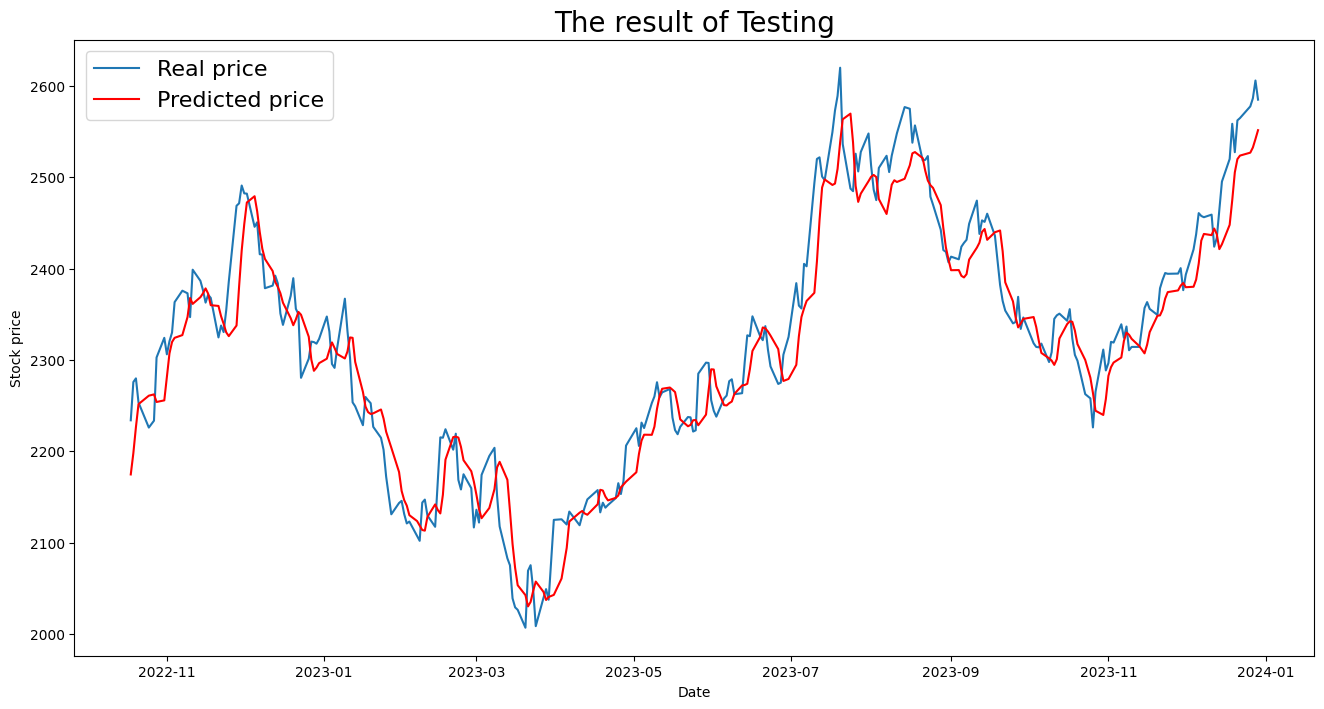

----- Test_RMSE_GRU ----- 38.078827014354474


In [61]:
# %% --------------------------------------- Plot the result  -----------------------------------------------------------------
def plot_testdataset_result(X_test, y_test):
    test_yhat = model.predict(X_test, verbose=0)
    y_scaler = load(open('../Model_train_data/y_scaler.pkl', 'rb'))
    test_predict_index = np.load("../Model_train_data/index_test.npy", allow_pickle=True)

    rescaled_real_y = y_scaler.inverse_transform(y_test)
    rescaled_predicted_y = y_scaler.inverse_transform(test_yhat)

    predict_result = pd.DataFrame()
    for i in range(rescaled_predicted_y.shape[0]):
        y_predict = pd.DataFrame(rescaled_predicted_y[i], columns=["predicted_price"],
                                 index=test_predict_index[i:i + output_dim])
        predict_result = pd.concat([predict_result, y_predict], axis=1, sort=False)

    real_price = pd.DataFrame()
    for i in range(rescaled_real_y.shape[0]):
        y_train = pd.DataFrame(rescaled_real_y[i], columns=["real_price"],
                               index=test_predict_index[i:i + output_dim])
        real_price = pd.concat([real_price, y_train], axis=1, sort=False)

    predict_result['predicted_mean'] = predict_result.mean(axis=1)
    real_price['real_mean'] = real_price.mean(axis=1)

    # Plot the predicted result
    plt.figure(figsize=(16, 8))
    plt.plot(real_price["real_mean"])
    plt.plot(predict_result["predicted_mean"], color='r')
    plt.xlabel("Date")
    plt.ylabel("Stock price")
    plt.legend(("Real price", "Predicted price"), loc="upper left", fontsize=16)
    plt.title("The result of Testing", fontsize=20)
    plt.savefig('../Training_loss/GRU_Testing_Stockplot.png')
    plt.show()

    # Calculate RMSE
    predicted = predict_result["predicted_mean"]
    real = real_price["real_mean"]
    RMSE = np.sqrt(mean_squared_error(predicted, real))

    return RMSE

test_RMSE = plot_testdataset_result(X_test, y_test)
print("----- Test_RMSE_GRU -----", test_RMSE)